# Criando um modelo de Regressão Linear
- Tenho os dados de preço, desconto e venda e vou fazer uma campanha de natal nas lojas com o preço de 17.50 e desconto de até 40 centavos e preciso saber quanto de estoque eu devo mandar para a loja

In [4]:
# Importando a base de dados
# - Base de dados: "dadosVenda.xlsx"
import pandas as pd
dados = pd.read_excel('dadosVenda.xlsx')

In [5]:
# Visualizando os dados
dados.head()

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
0,1,21.85,23,1.15,81
1,2,4.30,5,0.70,3361
2,3,13.65,15,1.35,1551
3,4,4.97,7,2.03,3036
4,5,9.60,10,0.40,2436


In [9]:
# Verificando as informações da base
dados.loc[dados.Desconto.isnull(),'Desconto'] = 0

**Tratando valores vazios**

In [16]:
# Ajustando os dados com valores de desconto vazio
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDRegistro     1634 non-null   int64  
 1   PrecoVenda     1634 non-null   float64
 2   PrecoOriginal  1634 non-null   int64  
 3   Desconto       1634 non-null   float64
 4   VendaQtd       1634 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 64.0 KB


In [ ]:
# Verificando novamente as informações da base

**Entendendo a base**

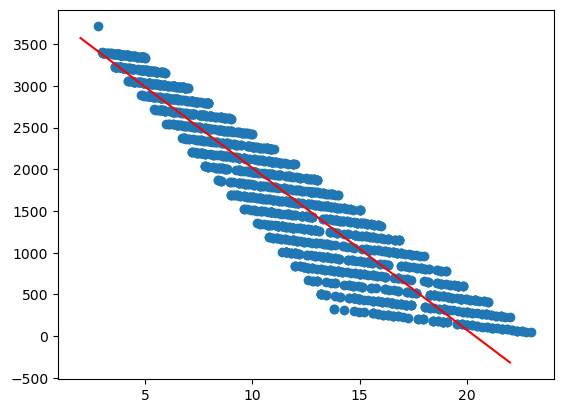

In [32]:
# Podemos fazer o scatter plot
import matplotlib.pyplot as plt
import numpy as np

fig ,ax = plt.subplots()

ax.scatter(dados.PrecoVenda, dados.VendaQtd)
x_plot = np.arange(2,23)
y_plot = reg.coef_[0]*x_plot + reg.intercept_
ax.plot(x_plot,y_plot,c='r')

plt.show()


### Definição do modelo
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [24]:
# Importando o LinearRegression
from sklearn.linear_model import LinearRegression


In [25]:
# Criando os dados
x = dados.PrecoVenda
y = dados.VendaQtd

In [29]:
# Fazendo o fit do modelo
reg = LinearRegression().fit(x.values.reshape(-1, 1), y)

In [36]:
# Podemos definir uma lista de valores para fazermos a previsão
import numpy as np
import pandas as pd
valores = {
    'valores': [17.50, 17.40, 17.30, 17.20, 17.10]
}

valores = pd.DataFrame(valores)

In [37]:
# Fazendo o predict
reg.predict(valores)

C:\Users\cross\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([559.94606196, 579.3805924 , 598.81512285, 618.2496533 ,
       637.68418374])

In [38]:
# Verificando os dados para esse mesmo preço de venda
dados[dados.PrecoVenda == 17.10]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
397,398,17.1,19,1.9,836
492,493,17.1,19,1.9,836
1414,1415,17.1,18,0.9,988


In [39]:
# Verificando os dados para um range de preços e descontos
dados[(dados.PrecoOriginal >= 17) & (dados.PrecoOriginal <= 18) & (dados.Desconto >= 0) & (dados.Desconto <= 0.4)]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
108,109,16.83,17,0.17,1148
284,285,16.66,17,0.34,1154
452,453,18.00,18,0.00,960
989,990,16.83,17,0.17,1148
998,999,16.83,17,0.17,1148
1115,1116,17.82,18,0.18,966
1220,1221,17.64,18,0.36,971
1539,1540,16.66,17,0.34,1154
1548,1549,16.66,17,0.34,1154
1576,1577,16.83,17,0.17,1148


### Escolhendo novas entradas pro modelo
- Podemos, ao invés de usar PrecoVenda, usar PrecoOriginal e Desconto

In [40]:
# Verificando novamente os dados para um range de preços e descontos
dados[(dados.PrecoOriginal >= 17) & (dados.PrecoOriginal <= 18) & (dados.Desconto >= 0) & (dados.Desconto <= 0.4)]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
108,109,16.83,17,0.17,1148
284,285,16.66,17,0.34,1154
452,453,18.00,18,0.00,960
989,990,16.83,17,0.17,1148
998,999,16.83,17,0.17,1148
1115,1116,17.82,18,0.18,966
1220,1221,17.64,18,0.36,971
1539,1540,16.66,17,0.34,1154
1548,1549,16.66,17,0.34,1154
1576,1577,16.83,17,0.17,1148


In [ ]:
# IMPORTAR O ALGORITMO

From sklearn.linear_model import LinearRegression

In [50]:
# dados
x2 = dados[['PrecoOriginal','Desconto']]
y2 = dados.VendaQtd

In [51]:
# fazendo o fit
reg2 = LinearRegression().fit(x2, y2)

In [52]:
reg2.score(x2, y2)

0.9999999083594651

In [55]:
# coeficiente angular
reg2.coef_

array([-182.99974391,   31.00137454])

In [56]:
# coeficiente linear
reg2.intercept_

4254.000243943653

### Analisando erros
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

**Fazendo o predict apenas com o preço de venda**

In [61]:
dados['model1'] = reg.predict(dados.PrecoVenda.values.reshape(-1,1))
dados['model2'] = reg2.predict(dados[['PrecoOriginal','Desconto']])

In [62]:
dados.head()

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd,model1,model2
0,1,21.85,23,1.15,81,-285.456012,80.657715
1,2,4.30,5,0.70,3361,3125.304081,3360.702487
2,3,13.65,15,1.35,1551,1308.175484,1550.855941
3,4,4.97,7,2.03,3036,2995.092727,3035.934827
4,5,9.60,10,0.40,2436,2095.273967,2436.403355


**Fazendo o predict apenas com o preço original e o desconto**

In [64]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred, multioutput='model2')


NameError: name 'y_true' is not defined